# Earthquake Prediction
It is well known that if a disaster has happened in a region, it is likely to happen there again. Some regions really have frequent earthquakes, but this is just a comparative quantity compared to other regions.
So, predicting the earthquake with Date and Time, Latitude and Longitude from previous data is not a trend which follows like other things, it is natural occuring. 

Import the necessary libraries required for buidling the model and data analysis of the earthquakes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_13196\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Read the data from csv and also columns which are necessary for the model and the column which needs to be predicted.

In [2]:
data = pd.read_csv("turkey_earthquakes.csv")
data.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20231231222846,2023.12.31,22:28:46.51,37.4900,43.7095,2.6,3.8,0.0,3.8,3.8,0.0,0.0,Ke,BAYKOY- (HAKKARI) [South 6.8 km]
1,2,20231231170605,2023.12.31,17:06:05.42,37.4405,43.9263,5.0,4.5,0.0,4.5,4.4,0.0,0.0,Ke,YAZILI-YUKSEKOVA (HAKKARI) [South West 3.6 km]
2,3,20231231165304,2023.12.31,16:53:04.13,37.4942,43.6955,5.0,3.5,0.0,3.5,3.4,0.0,0.0,Ke,CIMENLI- (HAKKARI) [East 6.1 km]
3,4,20231231163755,2023.12.31,16:37:55.84,37.4763,43.6965,5.0,4.6,0.0,4.6,4.4,0.0,0.0,Ke,CIMENLI- (HAKKARI) [South East 6.3 km]
4,5,20231230204324,2023.12.30,20:43:24.21,40.2272,29.1705,12.9,3.6,0.0,3.6,3.4,0.0,0.0,Ke,GURSU (BURSA) [North West 2.2 km]


In [3]:
data.columns

Index(['No', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem', 'Boylam',
       'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'],
      dtype='object')

In [4]:
data.rename(columns={
    'Olus tarihi': 'Date',
    'Olus zamani': 'Time',
    'Enlem': 'Latitude',
    'Boylam': 'Longitude',
    'Derinlik': 'Depth',
    'xM': 'Magnitude'
}, inplace=True)

Figure out the main features from earthquake data and create a object of that features, namely, Date, Time, Latitude, Longitude, Depth, Magnitude.

In [5]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,2023.12.31,22:28:46.51,37.4900,43.7095,2.6,3.8
1,2023.12.31,17:06:05.42,37.4405,43.9263,5.0,4.5
2,2023.12.31,16:53:04.13,37.4942,43.6955,5.0,3.5
3,2023.12.31,16:37:55.84,37.4763,43.6965,5.0,4.6
4,2023.12.30,20:43:24.21,40.2272,29.1705,12.9,3.6


Here, the data is random we need to scale according to inputs to the model. In this, we convert given Date and Time to Unix time which is in seconds and a numeral. This can be easily used as input for the network we built.

In [6]:
# Date ve Time sütunlarını birleştir ve timestamp'e dönüştür
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Her satırın önceki satırla farkını hesapla
data['Time_Diff'] = data['Timestamp'].diff()

# Zaman farkını saat ve dakika cinsinden integer'a dönüştür
# `Time_Difference` verisini dakikalara çeviriyoruz ve ardından saat ve dakika olarak böleceğiz
data['Time_Diff'] = data['Time_Diff'].dt.total_seconds() // 60

# Sonucu kontrol et
print(data[['Timestamp', 'Time_Diff']])

                    Timestamp  Time_Diff
0     2023-12-31 22:28:46.510        NaN
1     2023-12-31 17:06:05.420     -323.0
2     2023-12-31 16:53:04.130      -14.0
3     2023-12-31 16:37:55.840      -16.0
4     2023-12-30 20:43:24.210    -1195.0
...                       ...        ...
20302 1915-09-23 07:20:01.000  -133847.0
20303 1915-05-19 04:48:02.400  -183032.0
20304 1915-04-01 05:41:05.000   -69067.0
20305 1915-02-28 12:47:02.400   -45655.0
20306 1915-02-14 08:20:00.600   -20428.0

[20307 rows x 2 columns]


In [7]:
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Timestamp,Time_Diff
0,2023.12.31,22:28:46.51,37.4900,43.7095,2.6,3.8,2023-12-31 22:28:46.510,NaN
1,2023.12.31,17:06:05.42,37.4405,43.9263,5.0,4.5,2023-12-31 17:06:05.420,-323.0
2,2023.12.31,16:53:04.13,37.4942,43.6955,5.0,3.5,2023-12-31 16:53:04.130,-14.0
3,2023.12.31,16:37:55.84,37.4763,43.6965,5.0,4.6,2023-12-31 16:37:55.840,-16.0
4,2023.12.30,20:43:24.21,40.2272,29.1705,12.9,3.6,2023-12-30 20:43:24.210,-1195.0


In [8]:
# Latitude ve Longitude değerlerine göre filtreleme
filtered_data = data[(data['Latitude'] >= 37.3) & (data['Latitude'] <= 39) &
                     (data['Longitude'] >= 26.1) & (data['Longitude'] <= 29.9)]

In [9]:
filtered_data

,Date,Time,Latitude,Longitude,Depth,Magnitude,Timestamp,Time_Diff
75,2023.10.20,20:53:08.67,38.3393,27.2000,13.3,4.1,2023-10-20 20:53:08.670,-493.0
79,2023.10.18,12:55:24.74,38.1968,27.6873,10.3,4.3,2023-10-18 12:55:24.740,-931.0
91,2023.10.09,22:57:59.48,37.7927,26.9352,10.7,3.8,2023-10-09 22:57:59.480,-2519.0
96,2023.10.07,09:10:01.14,38.0210,27.1077,5.0,3.5,2023-10-07 09:10:01.140,-47.0
105,2023.10.01,13:30:16.87,38.3602,27.2092,7.1,4.0,2023-10-01 13:30:16.870,-127.0
...,...,...,...,...,...,...,...,...
20258,1920.07.02,14:13:01.00,37.5000,29.0000,15.0,4.5,1920-07-02 14:13:01.000,-2765.0
20277,1918.11.13,10:13:27.00,37.8000,27.3000,35.0,5.4,1918-11-13 10:13:27.000,-17426.0
20287,1918.01.16,07:13:28.50,38.3400,29.4800,10.0,5.8,1918-01-16 07:13:28.500,-559.0
20289,1917.08.08,03:41:10.00,39.0000,27.0000,15.0,4.7,1917-08-08 03:41:10.000,-203281.0


In [10]:
filtered_data.to_csv("filtered.csv", index=False)

## Visualization
Here, all the earthquakes from the database in visualized on to the world map which shows clear representation of the locations where frequency of the earthquake will be more. 

In [58]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=37.3,urcrnrlat=39, llcrnrlon=26.1,urcrnrlon=29.9,lat_ts=20,resolution='f')

longitudes = filtered_data["Longitude"].tolist()
latitudes = filtered_data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=full,south_lat=37.3,north_lat_2=39,west_lon=26.1,east_lon=31)
x,y = m(longitudes,latitudes)

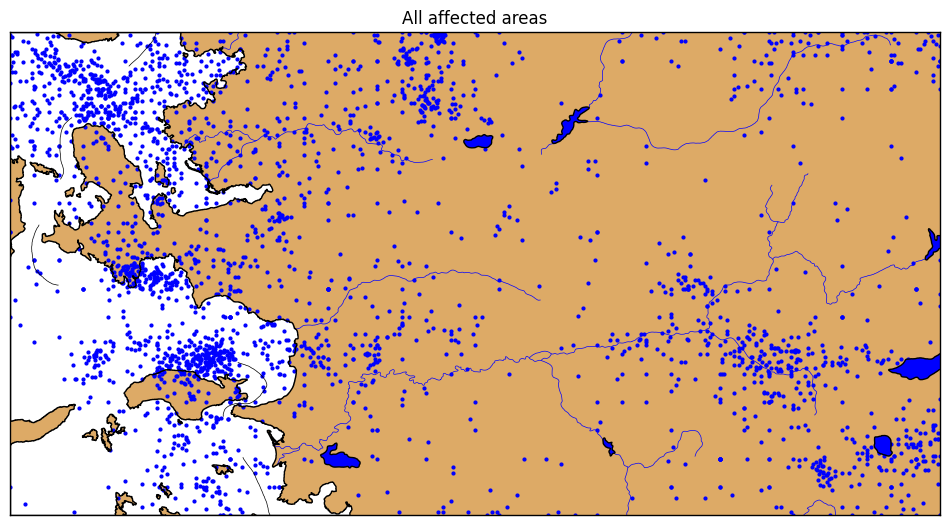

In [59]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.drawrivers(color='#0000ff')
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='#ddaa66', lake_color='#0000ff')
m.drawmapboundary()
m.drawcountries()

m.drawparallels(range(-90, 100, 10), linewidth=2, dashes=[4, 2], labels=[1,0,0,1], color='r', zorder=0 )

plt.show()

![alt text](fault.jpg)

### Splitting the Data
Firstly, split the data into Xs and ys which are input to the model and output of the model respectively. Here, inputs are TImestamp, Latitude and Longitude and outputs are Magnitude and Depth. Split the Xs and ys into train and test with validation. Training dataset contains 80% and Test dataset contains 20%.

In [62]:
filtered_data.describe()

,Latitude,Longitude,Depth,Magnitude,Timestamp,Time_Diff
count,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000
mean,38.218698,27.532790,10.941937,3.901456,1996-05-09 11:36:58.139727104,-2579.591190
min,37.300000,26.100000,0.000000,3.500000,1916-08-17 20:22:00,-207094.000000
25%,37.832500,26.700000,5.000000,3.600000,1981-11-26 20:36:10.650000,-2073.500000
50%,38.140000,27.040000,9.200000,3.700000,1997-01-21 20:47:46.600000,-576.000000
75%,38.720000,28.185000,12.400000,4.000000,2013-10-27 08:49:47.980000,-94.500000
max,39.000000,29.900000,130.000000,6.900000,2023-10-20 20:53:08.670000,-1.000000
std,0.498083,1.105662,10.510812,0.480469,NaN,9776.016676


In [63]:
data.isna().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
Timestamp    0
Time_Diff    1
dtype: int64

In [64]:
X = filtered_data[['Time_Diff', 'Latitude', 'Longitude']]
y = filtered_data[['Magnitude', 'Depth']]

In [65]:
print(X)
print(y)
print(len(X), len(y))

       Time_Diff  Latitude  Longitude
75        -493.0   38.3393    27.2000
79        -931.0   38.1968    27.6873
91       -2519.0   37.7927    26.9352
96         -47.0   38.0210    27.1077
105       -127.0   38.3602    27.2092
...          ...       ...        ...
20258    -2765.0   37.5000    29.0000
20277   -17426.0   37.8000    27.3000
20287     -559.0   38.3400    29.4800
20289  -203281.0   39.0000    27.0000
20298  -103706.0   38.2000    26.2000

[2747 rows x 3 columns]
       Magnitude  Depth
75           4.1   13.3
79           4.3   10.3
91           3.8   10.7
96           3.5    5.0
105          4.0    7.1
...          ...    ...
20258        4.5   15.0
20277        5.4   35.0
20287        5.8   10.0
20289        4.7   15.0
20298        4.9   10.0

[2747 rows x 2 columns]
2747 2747


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(2197, 3) (550, 3) (2197, 2) (550, 3)


Here, we used the RandomForestRegressor model to predict the outputs, we see the strange prediction from this with score above 80% which can be assumed to be best fit but not due to its predicted values.

In [67]:
print(X_train.dtypes)
print(X_test.dtypes)

Time_Diff    float64
Latitude     float64
Longitude    float64
dtype: object
Time_Diff    float64
Latitude     float64
Longitude    float64
dtype: object


In [68]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([[ 3.851, 14.856],
       [ 3.907,  5.839],
       [ 3.751, 13.194],
       ...,
       [ 3.856,  9.039],
       [ 3.768,  9.093],
       [ 3.821, 11.162]])

In [69]:
reg.score(X_test, y_test)

0.014579070953025686

In [70]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[ 3.869 , 14.3848],
       [ 3.9414,  6.9148],
       [ 3.7806, 12.1286],
       ...,
       [ 3.8382,  9.0978],
       [ 3.7638,  9.1998],
       [ 3.8128, 10.6338]])

In [71]:
best_fit.score(X_test, y_test)

0.024510323560475777

### Neural Network model
In the above case it was more kind of linear regressor where the predicted values are not as expected. So, Now, we build the neural network to fit the data for training set. Neural Network consists of three Dense layer with each 16, 16, 2 nodes and relu, relu and softmax as activation function.

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In this, we define the hyperparameters with two or more options to find the best fit.

In [73]:
model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

Here, we find the best fit of the above model and get the mean test score and standard deviation of the best fit model.

In [74]:
# Kullanılabilir parametreleri kontrol edin
print(grid.get_params().keys())

dict_keys(['cv', 'error_score', 'estimator__model', 'estimator__build_fn', 'estimator__warm_start', 'estimator__random_state', 'estimator__optimizer', 'estimator__loss', 'estimator__metrics', 'estimator__batch_size', 'estimator__validation_batch_size', 'estimator__verbose', 'estimator__callbacks', 'estimator__validation_split', 'estimator__shuffle', 'estimator__run_eagerly', 'estimator__epochs', 'estimator__class_weight', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])


In [75]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=sigmoid)`
Check the list of available parameters with `estimator.get_params().keys()`

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Modeli oluşturan fonksiyon
def create_model(neurons=16, activation='relu', optimizer='adam', loss='sparse_categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=10, activation=activation))  # input_dim değerini veri setinize göre ayarlayın
    model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı, problem türüne göre değişebilir

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# KerasClassifier ile modelin sarılması
model = KerasClassifier(model=create_model, verbose=0)

# Hiperparametreler
neurons = [16]
batch_size = [10]
epochs = [10]
activation = ['sigmoid', 'relu']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

# Hiperparametre grid'i
param_grid = {
    'model__neurons': neurons,
    'batch_size': batch_size,
    'epochs': epochs,
    'model__activation': activation,
    'model__optimizer': optimizer,
    'model__loss': loss
}

# GridSearchCV ile hiperparametre araması
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)  # X_train ve y_train veri setinizi uygun değişkenlerle değiştirin

# Sonuçları yazdırma
print("En iyi: %f kullanarak %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py", line 855, in _initialize
    self.target_encoder_ = self.target_encoder.fit(y)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\utils\transformers.py", line 175, in fit
    raise ValueError(
ValueError: Unknown label type: continuous-multioutput.

To implement support, subclass KerasClassifier and override ``target_encoder`` with a transformer that supports this label type.

For information on sklearn target types, see: * https://scikit-learn.org/stable/modules/generated/sklearn.utils.multiclass.type_of_target.html * https://scikit-learn.org/stable/modules/multiclass.html

For information on the SciKeras data transformation interface, see: * https://www.adriangb.com/scikeras/stable/advanced.html#data-transformers


The best fit parameters are used for same model to compute the score with training data and testing data.

In [19]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 18727 samples, validate on 4682 samples
Epoch 1/20
18727/18727 [==============================] - 4s 233us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 2/20
18727/18727 [==============================] - 4s 220us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 3/20
18727/18727 [==============================] - 4s 228us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 4/20
18727/18727 [==============================] - 4s 222us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 5/20
18727/18727 [==============================] - 5s 262us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 6/20
18727/18727 [==============================] - 4s 223us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - val_acc: 0.9242
Epoch 7/20
18727/18727 [==============================] - 4s 220us/step - loss: 0.5038 - acc: 0.9182 - val_loss: 0.5038 - v

In [21]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

4682/4682 [==============================] - 0s 29us/step
Evaluation result on Test Data : Loss = 0.5038455790406056, accuracy = 0.9241777017858995


We see that the above model performs better but it also has lot of noise (loss) which can be neglected for prediction and use it for furthur prediction.

The above model is saved for furthur prediction.

In [22]:
model.save('earthquake.h5')